<font size=6 color="blue"><h1>Polynomial Regression</h1></font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

<font size=5 color="red"><h1>Creating a dataset</h1></font>

In [2]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2
# my goal is to find the coefficients

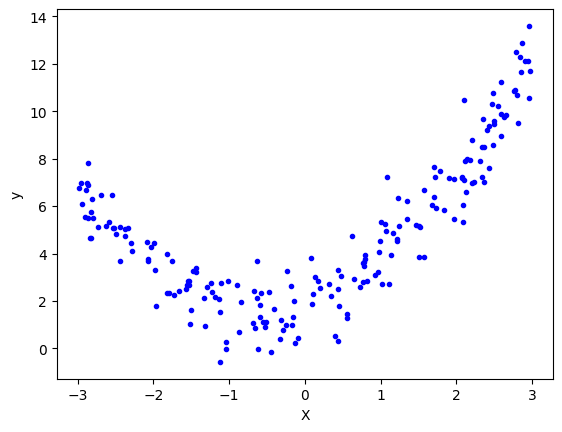

In [5]:
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [7]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [8]:
# Applying Polynomial Linear Regression
# degree 2
poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [9]:
print(X_train[0])
print(X_train_trans[0])

[1.05345885]
[1.         1.05345885 1.10977555]


In [ ]:
# include_bias parameter

In [10]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [11]:
y_pred = lr.predict(X_test_trans)

In [12]:
r2_score(y_test,y_pred)

0.9226728000092369

In [13]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.90684713 0.8430617 ]]
[1.96768659]


In [14]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

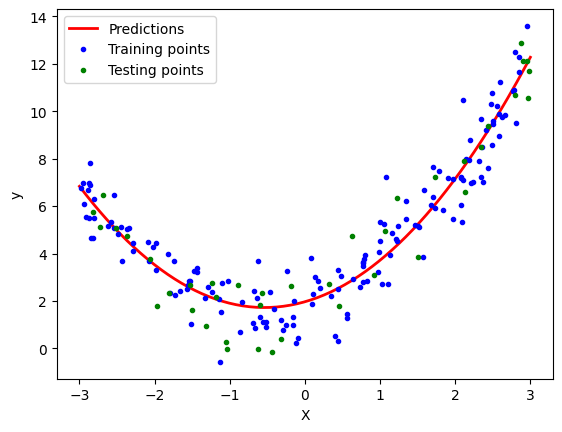

In [15]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()